![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [1]:
# Import appropriate libraries
import pandas as pd
import pingouin as pgn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t

In [2]:
# Read CSV files
men_file = 'men_results.csv'
women_file = 'women_results.csv'
men_data = pd.read_csv(men_file)
women_data = pd.read_csv(women_file)

# Explore DataFrames
print(men_data.info())
print(women_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int

In [3]:
# Explore men data
print(men_data.head(30))

    Unnamed: 0        date  ... away_score                 tournament
0            0  1872-11-30  ...          0                   Friendly
1            1  1873-03-08  ...          2                   Friendly
2            2  1874-03-07  ...          1                   Friendly
3            3  1875-03-06  ...          2                   Friendly
4            4  1876-03-04  ...          0                   Friendly
5            5  1876-03-25  ...          0                   Friendly
6            6  1877-03-03  ...          3                   Friendly
7            7  1877-03-05  ...          2                   Friendly
8            8  1878-03-02  ...          2                   Friendly
9            9  1878-03-23  ...          0                   Friendly
10          10  1879-01-18  ...          1                   Friendly
11          11  1879-04-05  ...          4                   Friendly
12          12  1879-04-07  ...          3                   Friendly
13          13  1880

In [4]:
# Explore women data
print(women_data.head(30))

    Unnamed: 0        date  ... away_score        tournament
0            0  1969-11-01  ...          0              Euro
1            1  1969-11-01  ...          3              Euro
2            2  1969-11-02  ...          0              Euro
3            3  1969-11-02  ...          1              Euro
4            4  1975-08-25  ...          2  AFC Championship
5            5  1975-08-25  ...          2  AFC Championship
6            6  1975-08-27  ...          0  AFC Championship
7            7  1975-08-27  ...          0  AFC Championship
8            8  1975-08-29  ...          0  AFC Championship
9            9  1975-08-29  ...          2  AFC Championship
10          10  1975-08-31  ...          2  AFC Championship
11          11  1975-08-31  ...          0  AFC Championship
12          12  1975-09-02  ...          0  AFC Championship
13          13  1975-09-02  ...          1  AFC Championship
14          14  1977-08-02  ...          0  AFC Championship
15          15  1977-08-

In [5]:
# Tidy up DataFrames
# Delete unnamed column
men_data.drop('Unnamed: 0', axis=1, inplace=True)
women_data.drop('Unnamed: 0', axis=1, inplace=True)

# Convert date columns
men_data['date'] = pd.to_datetime(men_data['date'])
women_data['date'] = pd.to_datetime(women_data['date'])

# Check changes
print(men_data.info())
print(men_data.head(10))
print(women_data.info())
print(women_data.head(10))
print(men_data['date'].max(), women_data['date'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44353 non-null  datetime64[ns]
 1   home_team   44353 non-null  object        
 2   away_team   44353 non-null  object        
 3   home_score  44353 non-null  int64         
 4   away_score  44353 non-null  int64         
 5   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.0+ MB
None
        date home_team away_team  home_score  away_score tournament
0 1872-11-30  Scotland   England           0           0   Friendly
1 1873-03-08   England  Scotland           4           2   Friendly
2 1874-03-07  Scotland   England           2           1   Friendly
3 1875-03-06   England  Scotland           2           2   Friendly
4 1876-03-04  Scotland   England           3           0   Friendly
5 1876-03-25  Scotland    

In [6]:
# Check tournament values to confirm data integrity
print(men_data['tournament'].value_counts())
print(women_data['tournament'].value_counts())

Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 141, dtype: int64
UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143


In [7]:
# Filter DataFrames by FIFA World Cup after 2002
men_condition = (men_data['date'] >= '2002-01-01') & (men_data['tournament'] == 'FIFA World Cup')
women_condition = (women_data['date'] >= '2002-01-01') & (women_data['tournament'] == 'FIFA World Cup')

men_pop = men_data[men_condition]
women_pop = women_data[women_condition]

# Check results
print(men_pop.head(20))
print(women_pop.head(20))

            date            home_team  ... away_score      tournament
25164 2002-05-31               France  ...          1  FIFA World Cup
25165 2002-06-01              Germany  ...          0  FIFA World Cup
25166 2002-06-01  Republic of Ireland  ...          1  FIFA World Cup
25167 2002-06-01              Uruguay  ...          2  FIFA World Cup
25168 2002-06-02            Argentina  ...          0  FIFA World Cup
25169 2002-06-02              England  ...          1  FIFA World Cup
25170 2002-06-02             Paraguay  ...          2  FIFA World Cup
25171 2002-06-02                Spain  ...          1  FIFA World Cup
25172 2002-06-03               Brazil  ...          1  FIFA World Cup
25173 2002-06-03              Croatia  ...          1  FIFA World Cup
25174 2002-06-03                Italy  ...          0  FIFA World Cup
25175 2002-06-04             China PR  ...          2  FIFA World Cup
25176 2002-06-04                Japan  ...          2  FIFA World Cup
25177 2002-06-04    

In [8]:
# Check population sizes
print(len(men_pop), len(women_pop))

384 200


In [9]:
# Calculate total goals for each dataset
men_pop['goals'] = men_pop['home_score'] + men_pop['away_score']
women_pop['goals'] = women_pop['home_score'] + women_pop['away_score']
print(men_pop['goals'].describe())
print(women_pop['goals'].describe())

count    384.000000
mean       2.513021
std        1.652544
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: goals, dtype: float64
count    200.000000
mean       2.980000
std        2.022387
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       13.000000
Name: goals, dtype: float64


<AxesSubplot: >

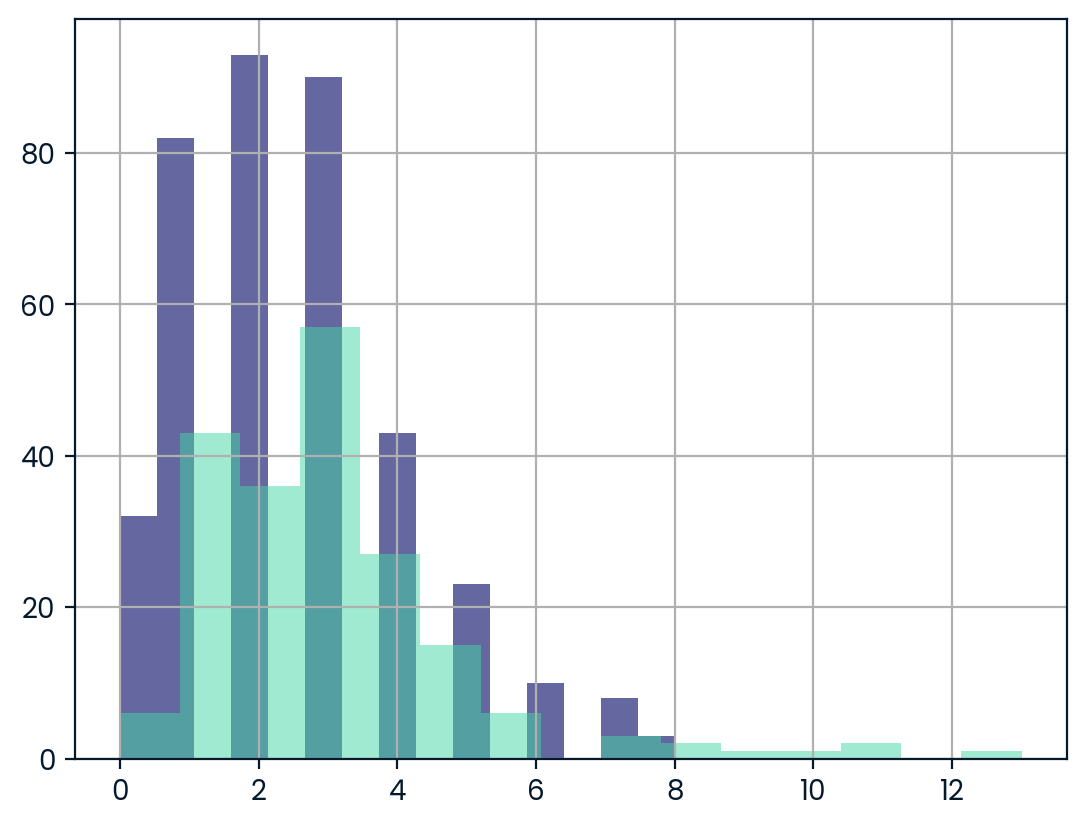

In [10]:
# Check distributions
men_pop['goals'].hist(bins=15)
women_pop['goals'].hist(bins=15, alpha=0.5)

In [11]:
# Set conditions for hypothesis testing
# Significance level
alpha = 0.01

# Men statistics
men_mean = men_pop['goals'].mean()
men_sd = men_pop['goals'].std()
men_n = len(men_pop)

# Women statistics
women_mean = women_pop['goals'].mean()
women_sd = women_pop['goals'].std()
women_n = len(women_pop)

In [12]:
# Add indicator to each dataset
men_pop['sex'] = 'men'
women_pop['sex'] = 'women'

# Concatenate datasets
full_set = pd.concat([men_pop, women_pop], ignore_index=True)
print(full_set)

          date            home_team  ... goals    sex
0   2002-05-31               France  ...     1    men
1   2002-06-01              Germany  ...     8    men
2   2002-06-01  Republic of Ireland  ...     2    men
3   2002-06-01              Uruguay  ...     3    men
4   2002-06-02            Argentina  ...     1    men
..         ...                  ...  ...   ...    ...
579 2019-06-29              Germany  ...     3  women
580 2019-07-02              England  ...     3  women
581 2019-07-03          Netherlands  ...     1  women
582 2019-07-06              England  ...     3  women
583 2019-07-07        United States  ...     2  women

[584 rows x 8 columns]


In [13]:
# Subset full set into goals and sex
goals_by_sex = full_set[['goals', 'sex']]
wide_set = goals_by_sex.pivot(columns='sex',
                              values='goals')

# Run Wilcoxon-Mann-Whitney test
mwu_test = pgn.mwu(x=wide_set['women'],
                   y=wide_set['men'],
                   alternative='greater')
print(mwu_test)

# Record p-value
p_val = mwu_test['p-val'][0]
print(p_val)

# Record result
if p_val <= alpha:
    result = 'reject'
    print(result)
else:
    result = 'fail to reject'
    print(result)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451
0.005106609825443641
reject


In [14]:
# Print result
result_dict = {
    'p_val': p_val,
    'result': result
}
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
